In [48]:
import pandas as pd
df = pd.read_csv('data/10162024_INSIGHT(opm).csv')

/var/folders/fv/wsjrgh1s06bcxlh0x0cbtzz80000gn/T/ipykernel_91903/368535775.py:2: DtypeWarning: Columns (32,33,35,36,37,38,39,42,44,45,46,47,70,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/10162024_INSIGHT(opm).csv')


In [49]:
# original list of variables
print(df.columns.tolist())

['department', 'bureau', 'date_open', 'qdate', 'year', 'agysub', 'pay_plan', 'job_series_str', 'job_series_num', 'job_series_title', 'grade', 'grade_highest', 'grade_lowest', 'usajobs_control_number', 'vacancy_job_title', 'vacancy_announcement_types', 'announcement_type', 'announcement_locations', 'announcement_open_date', 'announcement_close_date', 'announcement_open_date_fy', 'announcement_close_date_fy', 'application_limit_set', 'application_limit', 'assessment_used', 'off_the_shelf_assessment', 'assessment_questionnaire_used', 'other_assessment_type_used', 'selection_dummy', 'selection_num', 'selection_sep_announ_dummy', 'source', 'appointment_type', 'appointment_type_list', 'additional_manual_assessment_use', 'manual_assessment_method_details', 'applicant_eligibility_public', 'applicant_eligibility_internal', 'applicant_eligibility_status', 'applicant_eligibility_usajobs_in', 'assessment_groupings', 'appointment_type_groupings', 'vacancy_eligibility_list', 'total_applications', 'a

### Construct Dependent Variable: Posting_Length
posting_length: vacancy interval of an occupation

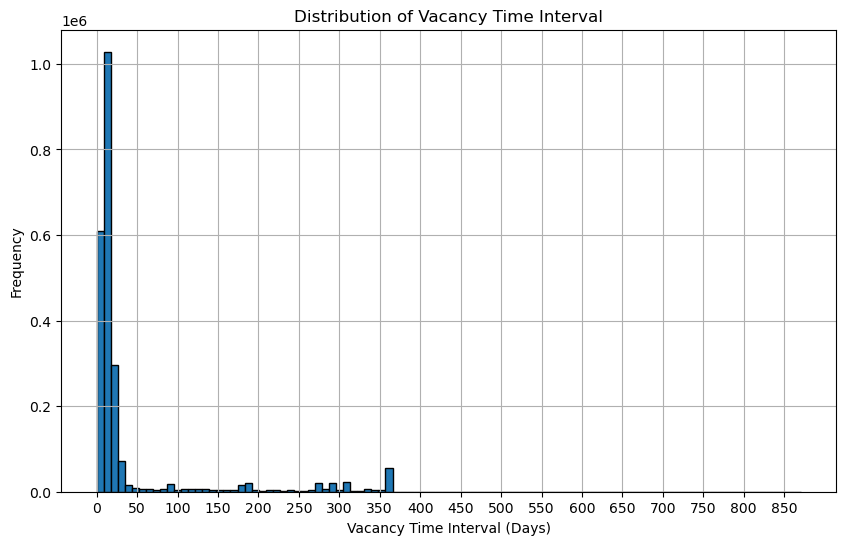

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a plot for the vacancy_time_interval distribution
plt.figure(figsize=(10, 6))
plt.hist(df['posting_length'].dropna(), bins=100, edgecolor='black')
plt.title('Distribution of Vacancy Time Interval')
plt.xlabel('Vacancy Time Interval (Days)')
plt.ylabel('Frequency')

# Set x-axis ticks to be spaced by 50 days
max_value = df['posting_length'].max()  # Get the maximum value in the data
plt.xticks(np.arange(0, max_value + 1, 50))  # Generate ticks from 0 to the max value, with a step of 50

plt.grid(True)
plt.show()


### Variables Selection

In [51]:
# List of columns to keep
columns_to_keep = [
    'posting_length', # the number of days the job posting was open
    'department', 
    'job_series_str', 'job_series_title', # job series title: the title of the occupation
    'grade', 'grade_highest', 'grade_lowest', # grade: the pay grade of the job
    'pay_plan',
    'appointment_type',
    'total_applications', 
    'stem', 'health', # binary columns
    'remote_work_available', 'telework_available', 'location_flexibility',
    'bls_occ_avg_jobs1000', # average number of jobs per 1000 jobs for a given occupation
    'bls_occ_avg_locquot', # average location quotient for a given occupation: LQ is a measure that indicates how concentrated a particular industry or occupation is in a region compared to the national average.
    'bls_occ_mean_hmean', # hourly mean wage
    'bls_occ_mean_amean' # annual mean wage
]

# Create a new DataFrame with only the specified columns
df_selected = df[columns_to_keep]
print(df_selected.shape)


(2329659, 19)


In [52]:
df_selected.sample(2)

,posting_length,department,job_series_str,job_series_title,grade,grade_highest,grade_lowest,pay_plan,appointment_type,total_applications,stem,health,remote_work_available,telework_available,location_flexibility,bls_occ_avg_jobs1000,bls_occ_avg_locquot,bls_occ_mean_hmean,bls_occ_mean_amean
1156454,7.0,Department of Defense,'0301,Miscellaneous Administration And Program,'09/11,11.0,9.0,GS,Permanent,66.0,0.0,0.0,0.0,0.0,NaN,132.74600,1.02,20.66,42970.0
288082,13.0,Department of Defense,'0301,Miscellaneous Administration And Program,'09,9.0,9.0,GS,NaN,13.0,0.0,0.0,0.0,0.0,NaN,135.66901,0.90,20.90,43470.0


#### Drop rows with Nan value of dependent variable

In [53]:

# Drop Nan rows and print the number of dropped rows in one line
print(f"Number of rows dropped: {df_selected.shape[0] - df_selected.dropna(subset=['posting_length']).shape[0]}")

df_selected = df_selected.dropna(subset=['posting_length'])

# Transfer posting_length to int type
df_selected['posting_length'] = df_selected['posting_length'].astype(int)

# Print the shape of the resulting DataFrame
print(df_selected.shape)


Number of rows dropped: 362
(2329297, 19)


#### Dummy pay_plan to GS==1 or non-GS==0

In [54]:
# value count for pay_plan
print(df_selected['pay_plan'].value_counts())

pay_plan
GS    1971789
VN      81769
IR      54705
GG      36066
NH      27791
       ...   
CG          1
FT          1
EF          1
EJ          1
IT          1
Name: count, Length: 96, dtype: int64


In [55]:
# Dummy pay_plan to GS==1 or non-GS==0
df_selected['pay_plan_GS_dummy'] = df_selected['pay_plan'].apply(lambda x: 1 if x == 'GS' else 0)
print(df_selected['pay_plan_GS_dummy'].value_counts())

pay_plan_GS_dummy
1    1971789
0     357508
Name: count, dtype: int64


In [56]:
df_selected.sample(2)

,posting_length,department,job_series_str,job_series_title,grade,grade_highest,grade_lowest,pay_plan,appointment_type,total_applications,stem,health,remote_work_available,telework_available,location_flexibility,bls_occ_avg_jobs1000,bls_occ_avg_locquot,bls_occ_mean_hmean,bls_occ_mean_amean,pay_plan_GS_dummy
1259544,7,Department of Agriculture,'1105,Purchasing,'05/06/07,7.0,5.0,GS,Permanent,127.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,1
579865,5,Department of Defense,'0679,Medical Support Assistance,'05,5.0,5.0,GS,Permanent,73.0,0.0,1.0,0.0,0.0,NaN,35.289665,0.91,26.336666,54776.668,1


#### Dummy appointment_type Permanent Vs. Non-permanant

In [57]:
# count the appointment_type values
df_selected['appointment_type'].value_counts()
### suggestion: permenant or not-permenant

appointment_type
Permanent                     1961383
Multiple Appointment Types      65934
Term                            52239
Intermittent                     6853
Seasonal                         3031
Agency Employees Only             576
Term appt, NTE 4 yrs              284
Term appt, NTE 13 mos             278
Term appt, NTE 2 yrs              270
Agency employees only             115
Term appt, NTE 3 yrs               14
Term appt, NTE 5 yrs                1
Name: count, dtype: int64

In [58]:
# dummy appointment_type Permanent == 1 Vs. others == 0
df_selected['appointment_type_Permanent_dummy'] = df_selected['appointment_type'].apply(lambda x: 1 if x == 'Permanent' else 0)
df_selected['appointment_type_Permanent_dummy'].value_counts()

appointment_type_Permanent_dummy
1    1961383
0     367914
Name: count, dtype: int64

#### Convert to INT, remote_work_available

In [59]:
# change remote_work_available to int
df_selected['remote_work_available'] = df_selected['remote_work_available'].astype(int)

# count remote_work_available values
df_selected['remote_work_available'].value_counts()

remote_work_available
0    2307879
1      21418
Name: count, dtype: int64

#### telework_available - Dropped

In [60]:
# count telework_available values
df_selected['telework_available'].value_counts() # drop it, as most of them are not telework available
# drop telework_available
df_selected = df_selected.drop(columns=['telework_available'])

#### location_flexibitliy - dropped

In [61]:
# location_flexibility
print(df_selected['location_flexibility'].value_counts())

# print NA values for location_flexibility
print(df_selected['location_flexibility'].isna().sum())

# drop location_flexibility, as it has too many NA values
df_selected = df_selected.drop(columns=['location_flexibility'])

location_flexibility
1.0    46689
Name: count, dtype: int64
2282608


#### Convert STEM and Health to INT type


In [62]:
#### Convert STEM and Health from float to integer type
df_selected['stem'] = df_selected['stem'].astype(int)
df_selected['health'] = df_selected['health'].astype(int)

#### total_applications

In [63]:
# check how many NA values in total_applications
print("NA values total_applications:", df_selected['total_applications'].isna().sum())

# drop NA values in total_applications
df_selected = df_selected.dropna(subset=['total_applications'])

# convert total_applications to int
df_selected['total_applications'] = df_selected['total_applications'].astype(int)

NA values total_applications: 4906


#### BLS variables - Drop NA values


In [64]:
# print dropped rows:
print(f"Number of rows dropped: {df_selected.shape[0] - df_selected.dropna(subset=['bls_occ_avg_jobs1000', 'bls_occ_avg_locquot', 'bls_occ_mean_hmean', 'bls_occ_mean_amean']).shape[0]}")


# print how many rows has NA values for bls_occ_avg_jobs1000
print(df_selected['bls_occ_avg_jobs1000'].isna().sum())
# print how many rows has NA values for bls_occ_avg_locquot
print(df_selected['bls_occ_avg_locquot'].isna().sum())
# print how many rows has NA values for bls_occ_mean_hmean
print(df_selected['bls_occ_mean_hmean'].isna().sum())
# print how many rows has NA values for bls_occ_mean_amean
print(df_selected['bls_occ_mean_amean'].isna().sum())


# drop rows with NA values for bls_occ_avg_jobs1000, bls_occ_avg_locquot, bls_occ_mean_hmean, bls_occ_mean_amean
df_selected = df_selected.dropna(subset=['bls_occ_avg_jobs1000', 'bls_occ_avg_locquot', 'bls_occ_mean_hmean', 'bls_occ_mean_amean'])
print(df_selected.shape)

Number of rows dropped: 372051
372017
372017
372051
372051
(1952340, 19)


In [65]:
df_selected.sample(2)

,posting_length,department,job_series_str,job_series_title,grade,grade_highest,grade_lowest,pay_plan,appointment_type,total_applications,stem,health,remote_work_available,bls_occ_avg_jobs1000,bls_occ_avg_locquot,bls_occ_mean_hmean,bls_occ_mean_amean,pay_plan_GS_dummy,appointment_type_Permanent_dummy
133996,14,Department of Veterans Affairs,'0620,Practical Nurse,'03/04/05/06,6.0,3.0,GS,NaN,1,0,1,0,32.207668,0.926667,24.176666,50290.000,1,0
2022088,275,Department of Agriculture,'1035,Public Affairs,'11/12,12.0,11.0,GS,Permanent,274,0,0,0,2.288057,1.576415,26.868999,75915.617,1,1


#### Grade (pay grade)
grade_highest, grade_lowest

reference: https://www.law.cornell.edu/uscode/text/5/5104

The General Schedule, the symbol for which is “GS”, is the basic pay schedule for positions to which this chapter applies. The General Schedule is divided into grades of difficulty and responsibility of work

In [66]:
# check how many NA values in grade
print("NA values grade:", df_selected['grade'].isna().sum())
print("NA values grade_highest:", df_selected['grade_highest'].isna().sum())
print("NA values grade_lowest:", df_selected['grade_lowest'].isna().sum())
print("Before drop NA" , df_selected.shape[0])

# drop columns with NA values for grade_highest, grade_lowest
df_selected = df_selected.dropna(subset=['grade_highest', 'grade_lowest'])
print("After:", df_selected.shape[0])


NA values grade: 0
NA values grade_highest: 10568
NA values grade_lowest: 10568
Before drop NA 1952340
After: 1941772


In [67]:
# check how many rows that has different values for grade_highest and grade_lowest
print("Different values for grade_highest and grade_lowest:", df_selected[df_selected['grade_highest'] != df_selected['grade_lowest']].shape[0])
# calculate the percentage of rows that has different values for grade_highest and grade_lowest
print("Percentage of rows that has different values for grade_highest and grade_lowest:", df_selected[df_selected['grade_highest'] != df_selected['grade_lowest']].shape[0] / df_selected.shape[0])

Different values for grade_highest and grade_lowest: 483219
Percentage of rows that has different values for grade_highest and grade_lowest: 0.24885465440844753


In [68]:
# for the grade columns that has different values for grade_highest and grade_lowest, we will take the average of the two columns, and round up to the nearest integer
df_selected['grade_simplified'] = df_selected[['grade_highest', 'grade_lowest']].mean(axis=1).apply(lambda x: round(x))

### Organize DataFrame

Two CSV files have been created to store the processed data:

1. `data_cleaned_with_reference_columns.csv`
   - Contains all variables
   - Includes backup columns used to generate some of the variables

2. `data_cleaned.csv`
   - Contains only the variables that will be used for regression models

This organization allows for efficient data management and analysis:

- The first file (`data_cleaned_with_reference_columns.csv`) serves as a comprehensive dataset, preserving all information including intermediate steps.
- The second file (`data_cleaned.csv`) is a streamlined version, optimized for use in regression modeling.


In [69]:
# set index_column as job_posting_id
df_selected['job_posting_id'] = df_selected.index

# keep only these columns
df_selected = df_selected[[
    'job_posting_id',
    'posting_length', 
    'department', 'job_series_title', 'job_series_str', 
    'grade_simplified', 
    'pay_plan_GS_dummy', 
    'appointment_type_Permanent_dummy', 
    'total_applications', 'stem', 'health', 
    'remote_work_available', 
    'bls_occ_avg_jobs1000', 'bls_occ_avg_locquot', 'bls_occ_mean_hmean', 'bls_occ_mean_amean',
    
    ### These are backup columns, not used in the model:
    'pay_plan', # simplified to 'pay_plan_GS_dummy' - 1 if GS, 0 otherwise
    'appointment_type', # simplified to 'appointment_type_Permanent_dummy' - 1 if Permanent, 0 otherwise
    'grade','grade_highest', 'grade_lowest', # simplified to 'grade_simplified', if different get the average of 'grade_highest' and 'grade_lowest'
    ]]

In [70]:
# reset_index, rename it to job_posting_id
df_selected = df_selected.reset_index(drop=True)

In [71]:
print(df_selected.columns.tolist())
df_selected.head(2)

['job_posting_id', 'posting_length', 'department', 'job_series_title', 'job_series_str', 'grade_simplified', 'pay_plan_GS_dummy', 'appointment_type_Permanent_dummy', 'total_applications', 'stem', 'health', 'remote_work_available', 'bls_occ_avg_jobs1000', 'bls_occ_avg_locquot', 'bls_occ_mean_hmean', 'bls_occ_mean_amean', 'pay_plan', 'appointment_type', 'grade', 'grade_highest', 'grade_lowest']


,job_posting_id,posting_length,department,job_series_title,job_series_str,grade_simplified,pay_plan_GS_dummy,appointment_type_Permanent_dummy,total_applications,stem,...,remote_work_available,bls_occ_avg_jobs1000,bls_occ_avg_locquot,bls_occ_mean_hmean,bls_occ_mean_amean,pay_plan,appointment_type,grade,grade_highest,grade_lowest
0,48414,6,Department of Defense,Miscellaneous Clerk And Assistant,'0303,6,1,0,7,0,...,0,144.198,0.96,16.74,34810.0,GS,NaN,'06,6.0,6.0
1,48415,14,Department of Defense,Miscellaneous Administration And Program,'0301,14,1,0,45,0,...,0,144.198,0.96,16.74,34810.0,GS,Term,'14,14.0,14.0


In [72]:
df_selected.to_csv('data_cleaned_with_reference_columns.csv', index=False)

df_cleaned.csv

In [73]:
df_cleaned = df_selected[[
    'job_posting_id',
    'posting_length', 
    'department', 'job_series_title', 'job_series_str', 
    'grade_simplified', 
    'pay_plan_GS_dummy', 
    'appointment_type_Permanent_dummy', 
    'total_applications', 'stem', 'health', 
    'remote_work_available', 
    'bls_occ_avg_jobs1000', 'bls_occ_avg_locquot', 'bls_occ_mean_hmean', 'bls_occ_mean_amean'
]]

print(df_cleaned.columns.tolist())
df_cleaned.head(2)

['job_posting_id', 'posting_length', 'department', 'job_series_title', 'job_series_str', 'grade_simplified', 'pay_plan_GS_dummy', 'appointment_type_Permanent_dummy', 'total_applications', 'stem', 'health', 'remote_work_available', 'bls_occ_avg_jobs1000', 'bls_occ_avg_locquot', 'bls_occ_mean_hmean', 'bls_occ_mean_amean']


,job_posting_id,posting_length,department,job_series_title,job_series_str,grade_simplified,pay_plan_GS_dummy,appointment_type_Permanent_dummy,total_applications,stem,health,remote_work_available,bls_occ_avg_jobs1000,bls_occ_avg_locquot,bls_occ_mean_hmean,bls_occ_mean_amean
0,48414,6,Department of Defense,Miscellaneous Clerk And Assistant,'0303,6,1,0,7,0,0,0,144.198,0.96,16.74,34810.0
1,48415,14,Department of Defense,Miscellaneous Administration And Program,'0301,14,1,0,45,0,0,0,144.198,0.96,16.74,34810.0


In [75]:
# check if there are any NA values in the cleaned DataFrame
print(df_cleaned.isna().sum())

job_posting_id                      0
posting_length                      0
department                          0
job_series_title                    0
job_series_str                      0
grade_simplified                    0
pay_plan_GS_dummy                   0
appointment_type_Permanent_dummy    0
total_applications                  0
stem                                0
health                              0
remote_work_available               0
bls_occ_avg_jobs1000                0
bls_occ_avg_locquot                 0
bls_occ_mean_hmean                  0
bls_occ_mean_amean                  0
dtype: int64


In [77]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941772 entries, 0 to 1941771
Data columns (total 16 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   job_posting_id                    int64  
 1   posting_length                    int64  
 2   department                        object 
 3   job_series_title                  object 
 4   job_series_str                    object 
 5   grade_simplified                  int64  
 6   pay_plan_GS_dummy                 int64  
 7   appointment_type_Permanent_dummy  int64  
 8   total_applications                int64  
 9   stem                              int64  
 10  health                            int64  
 11  remote_work_available             int64  
 12  bls_occ_avg_jobs1000              float64
 13  bls_occ_avg_locquot               float64
 14  bls_occ_mean_hmean                float64
 15  bls_occ_mean_amean                float64
dtypes: float64(4), int64(9), object(3)
m

In [78]:
df_cleaned.to_csv('data_cleaned.csv', index=False)